# Template/Completed Code

## Configs

In [1]:
DATA_PATH = "data/credit_card_data.csv"

## Imports

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns


## Data Loading + Cleaning

In [3]:
df = pd.read_csv(DATA_PATH, index_col="id")
original_length = len(df)
print(f"{original_length}")
df.head()

568630


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,V29
id,,,,,,,,,,,,,,,,,,,,,
0,-0.260648,-0.469648,31.122978,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,...,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0.0,C
1,0.985100,-0.356045,3.600400,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,0.529808,...,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0.0,C
2,-0.260272,-0.949385,20.221236,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,0.690708,...,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0.0,A
3,-0.152152,-0.508959,20.481129,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,0.575231,...,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0.0,C
4,-0.206820,-0.165280,17.360148,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,0.968046,...,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0.0,D


### Remove NAN Values

In [4]:
df = df.dropna()
new_length = len(df)
print(f"{len(df)=}")
df.head()

len(df)=416999


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,V29
id,,,,,,,,,,,,,,,,,,,,,
0,-0.260648,-0.469648,31.122978,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,...,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0.0,C
2,-0.260272,-0.949385,20.221236,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,0.690708,...,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0.0,A
4,-0.206820,-0.165280,17.360148,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,0.968046,...,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0.0,D
6,1.016482,-0.397181,2.745721,-0.144463,0.331022,0.629243,0.431262,-0.134007,0.796159,0.557015,...,-0.287017,-0.178197,-1.297597,1.182503,-0.604228,-0.198163,-0.087619,18954.45,0.0,B
7,-0.051306,-0.007194,11.863161,-0.877880,0.684668,0.714326,0.892615,-0.908409,0.901938,1.258025,...,-0.920426,0.034660,-1.091527,-0.742075,-0.104863,-1.382522,-2.748268,12298.23,0.0,C


### Qualitative --> Quantitative

In [5]:
df = pd.get_dummies(df)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V25,V26,V27,V28,Amount,Class,V29_A,V29_B,V29_C,V29_D
id,,,,,,,,,,,,,,,,,,,,,
0,-0.260648,-0.469648,31.122978,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,...,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0.0,False,False,True,False
2,-0.260272,-0.949385,20.221236,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,0.690708,...,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0.0,True,False,False,False
4,-0.206820,-0.165280,17.360148,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,0.968046,...,-0.414116,1.071126,0.023712,0.419117,14278.97,0.0,False,False,False,True
6,1.016482,-0.397181,2.745721,-0.144463,0.331022,0.629243,0.431262,-0.134007,0.796159,0.557015,...,1.182503,-0.604228,-0.198163,-0.087619,18954.45,0.0,False,True,False,False
7,-0.051306,-0.007194,11.863161,-0.877880,0.684668,0.714326,0.892615,-0.908409,0.901938,1.258025,...,-0.742075,-0.104863,-1.382522,-2.748268,12298.23,0.0,False,False,True,False


### Scaling Values

In [6]:
df.mean()

V1           -0.000456
V2            0.000859
V3           -4.340167
V4            0.001442
V5           -0.000813
V6           -0.000410
V7           -0.001197
V8           -0.000311
V9           -0.001038
V10          -0.000774
V11           0.001261
V12          -0.000867
V13           0.000196
V14          -0.000595
V15          -0.000768
V16          -0.000926
V17          -0.001420
V18          -0.001514
V19           0.000827
V20          -0.000986
V21           0.000065
V22          -0.000246
V23           0.000169
V24          -0.000386
V25           0.000613
V26          -0.000528
V27          -0.000140
V28           0.000480
Amount    12036.958422
Class         0.500294
V29_A         0.248763
V29_B         0.249595
V29_C         0.251173
V29_D         0.250468
dtype: float64

In [7]:
df.std()

V1           1.001063
V2           1.001869
V3          14.204420
V4           1.000203
V5           1.001615
V6           1.000446
V7           1.016510
V8           1.002398
V9           1.000787
V10          1.000838
V11          0.999936
V12          1.000631
V13          1.000193
V14          1.001159
V15          1.000334
V16          1.000861
V17          0.999301
V18          0.999312
V19          1.000461
V20          1.007858
V21          1.005393
V22          1.003497
V23          1.007237
V24          1.001368
V25          1.000647
V26          0.999314
V27          1.007096
V28          0.999666
Amount    6921.406066
Class        0.500001
V29_A        0.432297
V29_B        0.432779
V29_C        0.433688
V29_D        0.433283
dtype: float64

In [8]:
cols_to_scale = ["V1", "V2", "V3"]

for col in cols_to_scale:
    mean = df[col].mean()
    stdv = df[col].std()
    df[col] = (df[col] - mean) / stdv

In [9]:
df.mean()

V1        2.181048e-17
V2        4.471148e-17
V3        3.053467e-17
V4        1.441615e-03
V5       -8.125536e-04
V6       -4.101392e-04
V7       -1.197142e-03
V8       -3.110852e-04
V9       -1.037643e-03
V10      -7.736876e-04
V11       1.261425e-03
V12      -8.665816e-04
V13       1.964948e-04
V14      -5.952693e-04
V15      -7.682522e-04
V16      -9.264916e-04
V17      -1.419735e-03
V18      -1.514402e-03
V19       8.272164e-04
V20      -9.862650e-04
V21       6.498946e-05
V22      -2.459690e-04
V23       1.689856e-04
V24      -3.858441e-04
V25       6.130720e-04
V26      -5.279630e-04
V27      -1.404919e-04
V28       4.799987e-04
Amount    1.203696e+04
Class     5.002938e-01
V29_A     2.487632e-01
V29_B     2.495953e-01
V29_C     2.511733e-01
V29_D     2.504682e-01
dtype: float64

In [10]:
df.std()

V1           1.000000
V2           1.000000
V3           1.000000
V4           1.000203
V5           1.001615
V6           1.000446
V7           1.016510
V8           1.002398
V9           1.000787
V10          1.000838
V11          0.999936
V12          1.000631
V13          1.000193
V14          1.001159
V15          1.000334
V16          1.000861
V17          0.999301
V18          0.999312
V19          1.000461
V20          1.007858
V21          1.005393
V22          1.003497
V23          1.007237
V24          1.001368
V25          1.000647
V26          0.999314
V27          1.007096
V28          0.999666
Amount    6921.406066
Class        0.500001
V29_A        0.432297
V29_B        0.432779
V29_C        0.433688
V29_D        0.433283
dtype: float64

### Class Balancing

In [11]:
df['Class'].value_counts()

Class
1.0    208622
0.0    208377
Name: count, dtype: int64

## Dataset + Dataloader
https://pytorch.org/tutorials/beginner/basics/data_tutorial.html

### PyTorch Dataset

In [12]:
class CreditCardDataset(Dataset):
    def __init__(self, df, label_col="Class"):
        self.x = df.drop([label_col], axis=1).to_numpy().astype(np.float32)
        self.y = df[label_col].to_numpy().astype(np.float32)
        
    def __len__(self):
        return len(self.y)
    
    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]

### Make Train, Validation, Test, Datasets
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [13]:
train_data, other_data = train_test_split(df, test_size=0.3)
val_data, test_data = train_test_split(other_data, test_size = 0.9)

In [14]:
print(f"{len(train_data)=}")
print(f"{len(val_data)=}")
print(f"{len(test_data)=}")

len(train_data)=291899
len(val_data)=12510
len(test_data)=112590


In [15]:
train_dataset = CreditCardDataset(train_data)
val_data = CreditCardDataset(val_data)
test_data = CreditCardDataset(test_data)

### Pytorch DataLoader

In [16]:
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_dataloader = DataLoader(val_data, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=32, shuffle=True)

## Define Model
- Simple Network Definition: https://pytorch.org/tutorials/beginner/blitz/neural_networks_tutorial.html
- Linear Layer: https://pytorch.org/docs/stable/generated/torch.nn.Linear.html
- ReLU Activation Function: https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html
- Sigmoid Activation Function: https://pytorch.org/docs/stable/generated/torch.nn.Sigmoid.html

In [17]:
class SimpleANN(torch.nn.Module):
    def __init__(self, input_size):
        super(SimpleANN, self).__init__()
        self.lin1 = torch.nn.Linear(input_size, 32)
        self.relu_activation1 = torch.nn.ReLU()
        self.lin2 = torch.nn.Linear(32, 16)
        self.relu_activation2 = torch.nn.ReLU()
        self.lin3 = torch.nn.Linear(16, 1)
        self.sigmoid_activation = torch.nn.Sigmoid()
    
    def forward(self, x):
        x = self.lin1(x)
        x = self.relu_activation1(x)
        x = self.lin2(x)
        x = self.relu_activation2(x)
        x = self.lin3(x)
        x = self.sigmoid_activation(x)
        return x
        

In [18]:
input_size = train_dataset[0][0].size
input_size

33

In [19]:
classifier = SimpleANN(input_size)
print(classifier)

SimpleANN(
  (lin1): Linear(in_features=33, out_features=32, bias=True)
  (relu_activation1): ReLU()
  (lin2): Linear(in_features=32, out_features=16, bias=True)
  (relu_activation2): ReLU()
  (lin3): Linear(in_features=16, out_features=1, bias=True)
  (sigmoid_activation): Sigmoid()
)


## Train Model
- Training Loop Tutorial: https://pytorch.org/tutorials/beginner/introyt/trainingyt.html

### Loss Function
- Binary Cross Entropy With Logits Loss: https://pytorch.org/docs/stable/generated/torch.nn.BCEWithLogitsLoss.html

In [20]:
loss_fn = torch.nn.BCELoss()

### Optimizer
- Stochastic Gradient Descent Optimizer: https://pytorch.org/docs/stable/generated/torch.optim.SGD.html

In [21]:
optimizer = torch.optim.Adam(classifier.parameters(), lr=0.001)

### Get Model Accruacy Function

In [34]:
def get_model_accuracy(model, dataloader):
    model.eval()

    correct_predictions = 0
    total_predictions = 0
    all_labels = []
    all_preds = []

    with torch.no_grad():
        for inputs, labels in dataloader:
            outputs = model(inputs)
            predicted_classes = (outputs >= 0.5).float()

            all_labels.extend(labels.tolist())

            labels = labels.unsqueeze(1)

            correct_predictions += (predicted_classes == labels).sum().item()

            total_predictions += labels.size(0)
            
            
            all_preds.extend(predicted_classes.squeeze(1).tolist())

    accuracy = correct_predictions / total_predictions
    return accuracy, all_labels, all_preds

### Training Loop

In [23]:
NUM_EPOCHS = 1
loss_over_time = []
eval_accuracy_over_time = []
eval_frequency = 100

for epoch_number in range(NUM_EPOCHS):
    last_loss = 0.
    
    for batch_index, batch in enumerate(train_dataloader):
        optimizer.zero_grad()

        inputs, labels = batch
        model_predictions = classifier(inputs)
        loss = loss_fn(model_predictions, labels.unsqueeze(1))
        loss_over_time.append(loss.item())
        loss.backward()
        optimizer.step()
        
        if batch_index % eval_frequency == 0:
            eval_accuracy_over_time.append(get_model_accuracy(classifier, val_dataloader))
            classifier.train()
        
        
        print(f"Batch: {batch_index}, Loss: {loss}", end='\r')

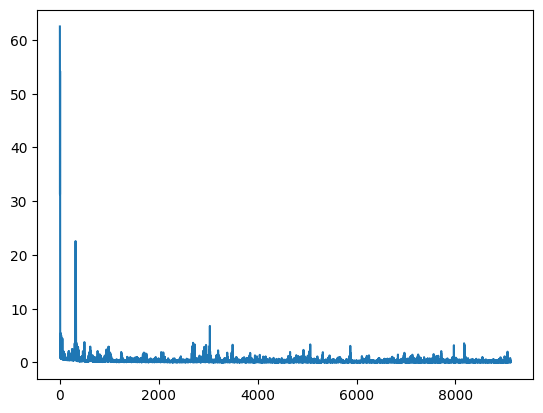

In [24]:
plt.plot(loss_over_time)
plt.show()

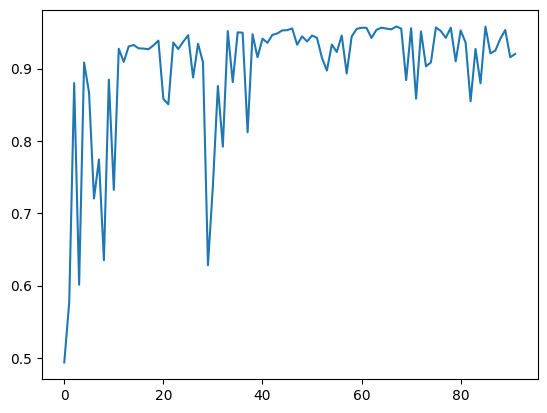

In [25]:
plt.plot(eval_accuracy_over_time)
plt.show()

## Test Model
- Method of determining accuracy in BC Problem: https://discuss.pytorch.org/t/calculate-accuracy-in-binary-classification/91758

In [35]:
accuracy, labels, preds = get_model_accuracy(classifier, test_dataloader)

In [41]:
print(accuracy)

0.9496402877697842


### Make Confusion Matrix


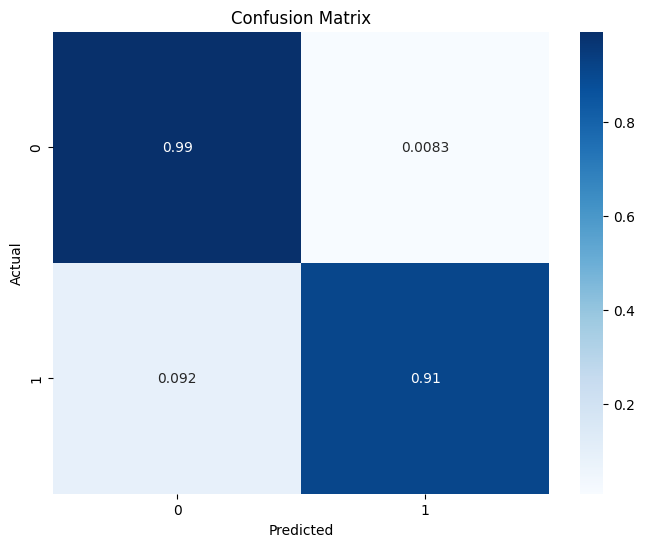

In [44]:
cm = confusion_matrix(labels, preds)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(8, 6))
sns.heatmap(cm_normalized, annot=True, cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()